# Unravelling the Nexus: 
# Investigating the Influence of Student Demographics on SAT Scores across New York City Boroughs

## Table of Contents

- [Introduction](#Introduction)  
- [Data Cleaning/Loading](#Data-Cleaning/Loading)  
- [Summary Statistics Tables](#Summary-Statistics-Tables)  
- [Plots, Histograms, Figures](#Plots-Histograms-Figures)  
- [Conclusion](#Conclusion)
- [Reference](#Reference)

## Introduction


## Data Cleaning/Loading

In [424]:
import pandas as pd

file = r"C:\Users\35911\Desktop\ECO225 Project\Data\scores.csv"
rawData = pd.read_csv(file)
rawData.head()


,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,41,-74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,41,-74,...,3:00 PM,87,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,41,-74,...,4:00 PM,1735,28.6%,13.3%,18.0%,38.5%,657,601,601,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,41,-74,...,2:45 PM,358,11.7%,38.5%,41.3%,5.9%,395,411,387,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,41,-74,...,3:00 PM,383,3.1%,28.2%,56.9%,8.6%,418,428,415,65.1%


In [425]:
num_rows = len(rawData) 
print(num_rows)

435


In [426]:
# Filter out rows with N/A values
cleaned_score = rawData.dropna()
num_rows_cleaned = len(cleaned_score)
print(num_rows_cleaned)

374


In [93]:
cleaned_score.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,2:45 PM,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:00 PM,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3:35 PM,416.0,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,95.9%
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,3:30 PM,255.0,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0,59.7%


In [427]:
# Removing duplicates
cleaned_score = cleaned_score.drop_duplicates()
num_rows_cleaned = len(cleaned_score)
print(num_rows_cleaned)

374


In [269]:
# Replace 'sat_reading', 'sat_math', and 'sat_writing' with the actual column names in your DataFrame

# Create a new column 'total_sat_scores' by adding the SAT reading, math, and writing scores
cleaned_data['SAT Score'] = cleaned_data['Average Score (SAT Math)'] + cleaned_data['Average Score (SAT Reading)'] + cleaned_data['Average Score (SAT Writing)'] 

# Display the DataFrame with the new variable
print(cleaned_data.head())


  School ID                                        School Name    Borough  \
2    01M539  New Explorations into Science, Technology and ...  Manhattan   
3    02M294                               Essex Street Academy  Manhattan   
4    02M308                       Lower Manhattan Arts Academy  Manhattan   
5    02M545    High School for Dual Language and Asian Studies  Manhattan   
6    01M292      Henry Street School for International Studies  Manhattan   

  Building Code       Street Address       City State  Zip Code  Latitude  \
2          M022  111 Columbia Street  Manhattan    NY     10002        41   
3          M445     350 Grand Street  Manhattan    NY     10002        41   
4          M445     350 Grand Street  Manhattan    NY     10002        41   
5          M445     350 Grand Street  Manhattan    NY     10002        41   
6          M056     220 Henry Street  Manhattan    NY     10002        41   

   Longitude  ... Student Enrollment Percent White Percent Black  \
2     

In [428]:
# Created the sum of average reading, writing, and math scores
cleaned_score['Total Average Score'] = cleaned_score['Average Score (SAT Math)'] + cleaned_score['Average Score (SAT Reading)'] + cleaned_score['Average Score (SAT Writing)']
print(cleaned_score['Total Average Score'].head())


2   1859
3   1193
4   1261
5   1529
6   1197
Name: Total Average Score, dtype: float64


In [429]:
cleaned_score['White'] = cleaned_score['Percent White'].str.replace('[^\d.]', '', regex=True)
cleaned_score['White'] = cleaned_score['White'].astype(float)
print(cleaned_score['White'].head())


2   29
3   12
4    3
5    2
6    4
Name: White, dtype: float64


In [430]:
cleaned_score['Black'] = cleaned_score['Percent Black'].str.replace('[^\d.]', '', regex=True)
cleaned_score['Black'] = cleaned_score['Black'].astype(float)
print(cleaned_score['Black'].head())

2   13
3   38
4   28
5    3
6   24
Name: Black, dtype: float64


In [431]:
cleaned_score['Hispanic'] = cleaned_score['Percent Hispanic'].str.replace('[^\d.]', '', regex=True)
cleaned_score['Hispanic'] = cleaned_score['Hispanic'].astype(float)
print(cleaned_score['Hispanic'].head())

2   18
3   41
4   57
5    6
6   57
Name: Hispanic, dtype: float64


In [432]:
cleaned_score['Asian'] = cleaned_score['Percent Asian'].str.replace('[^\d.]', '', regex=True)
cleaned_score['Asian'] = cleaned_score['Asian'].astype(float)
print(cleaned_score['Asian'].head())

2   38
3    6
4    9
5   89
6   13
Name: Asian, dtype: float64


In [433]:
# Create race "other" which includes students that are not white, black, Hispanic, or Asian. 
cleaned_score['Other'] = 100 - cleaned_score['White'] -  cleaned_score['Black'] -  cleaned_score['Hispanic'] -  cleaned_score['Asian'] 



## Summary Statistics Tables

In [239]:
import pandas as pd


# Reorder columns with "Student Enrollment" as the first column
cleaned_score = cleaned_score[['Student Enrollment', 'White', 'Black', 'Hispanic', 'Asian', 'Total Average Score']]

# Calculate summary statistics for variables of interest
summary_stats = cleaned_score.describe()

# Rename columns and add '%' symbol
summary_stats.rename(columns={
    'White': 'White (%)',
    'Black': 'Black (%)',
    'Hispanic': 'Hispanic (%)',
    'Asian': 'Asian (%)',
    'Total Average Score': 'Average SAT Score (out of 2400)'
}, inplace=True)

# Round student enrollment to the nearest whole number
summary_stats['Student Enrollment'] = summary_stats['Student Enrollment'].round()
summary_stats['Average SAT Score (out of 2400)'] = summary_stats['Average SAT Score (out of 2400)'].round()

# Customize styling for the summary statistics table
summary_stats_styled = summary_stats.style.format({
    'White (%)': '{:.1f}', 
    'Black (%)': '{:.1f}', 
    'Hispanic (%)': '{:.1f}', 
    'Asian (%)': '{:.1f}', 
    'Student Enrollment': '{:.0f}',  # Format as whole number
    'Average SAT Score (out of 2400)': '{:.0f}'
})



summary_stats_styled = summary_stats_styled.set_caption('<h1><b>Summary Statistics for Demographics and SAT Scores')


# Display the styled summary statistics table
display(summary_stats_styled)


# Calculate summary statistics for the 'Borough' column
#summary_borough = cleaned_score[['Borough']].describe()

# Customize styling for the 'Borough' summary table
#summary_borough_styled = summary_borough.style.set_caption('<h1><b>Summary Statistics for Borough')

# Display the styled 'Borough' summary table
#display(summary_borough_styled)

,Student Enrollment,White (%),Black (%),Hispanic (%),Asian (%),Average SAT Score (out of 2400)
count,374,374.0,374.0,374.0,374.0,374
mean,756,8.5,35.4,43.9,10.4,1275
std,774,13.4,25.4,24.5,14.4,195
min,142,0.0,0.0,2.6,0.0,924
25%,397,1.3,16.4,20.8,1.6,1157
50%,482,2.6,28.8,45.3,4.2,1226
75%,660,9.4,50.1,63.4,11.1,1327
max,5447,79.9,91.2,100.0,88.9,2144


In our endeavour to assess disparities that affect academic achievement, we select the dependent variable “Average SAT Score” as our metric for gauging student performance. Our chosen independent variables in representing student demographics are “White,” “Black,” “Hispanic,” and “Asian.” These four groups are the predominant population in the United States, and together usually comprise more than 95% of the student population in each school. Additionally, in order to analyze the difference in spatial perspectives, we include the independent variable “Borough” which represents New York’s five governing districts. 


The “Average SAT Score” represents the mean SAT score of the students who took the SAT test during the 2014-2015 school year at each school in our dataset. This score is based on the old 2400-point scale, where the SAT Reading, Writing, and Math each contribute 800 points. The average SAT score serves as a reliable indicator of academic performance because of its standardized nature and its reflection on the educational outcomes of students. 

Each of our four independent variables representing the four main races in New York City is a percentage, indicating the proportion of students of that particular race. For example, if “White” is 34, then 34% of students in that school are white. The racial profile of a school constitutes an important aspect of student demographics. Precisely identifying the racial components of each school is crucial in our endeavour to explore the impact of student demographics on academic accomplishments. Many studies have demonstrated that in various scenarios, students’ race is correlated with their academic outcomes. Therefore, analyzing the relationship between these variables and SAT scores serves as a meaningful starting point for examining education disparities. 

To contextualize the significance of school location in education outcomes, we incorporate the variable “borough” into our investigation. New York City comprises five governing boroughs: the Bronx, Brooklyn, Manhattan, Queens, and Staten Island. Each borough exhibits distinct socioeconomic status, with Manhattan typically leading in income and economic wealth, Wealthier areas often possess more resources to invest in public school education. Studies have consistently demonstrated that students with wealthy backgrounds tend to have a significant advantage in scoring higher on standardized tests such as the SATs (gazetteterrymurphy, 2023). Therefore, conducting an extensive analysis of education disparities needs to consider the geographical location of schools. 


## Plots, Histograms, Figures 

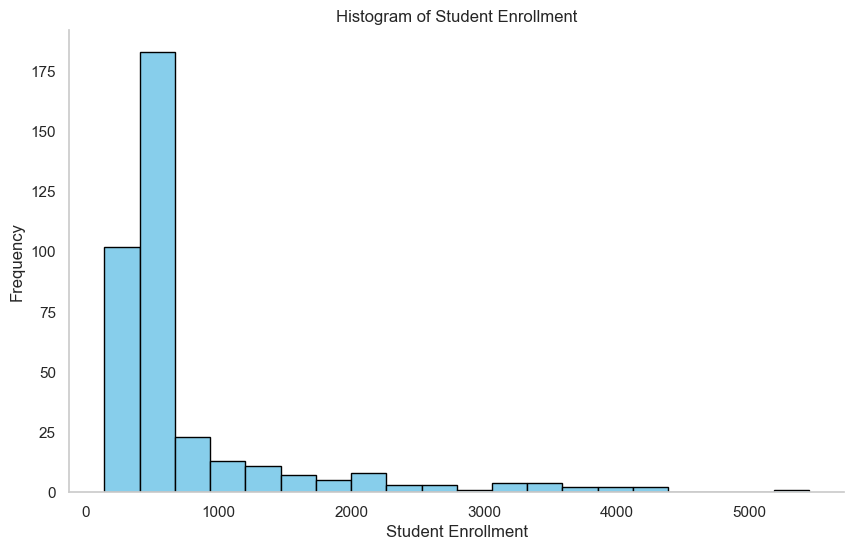

In [434]:
import matplotlib.pyplot as plt

# Extract student enrollment values
enrollment_values = cleaned_score['Student Enrollment'].tolist()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(enrollment_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Student Enrollment')
plt.xlabel('Student Enrollment')
plt.ylabel('Frequency')
# Turn off right and top axes
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(False)
plt.show()



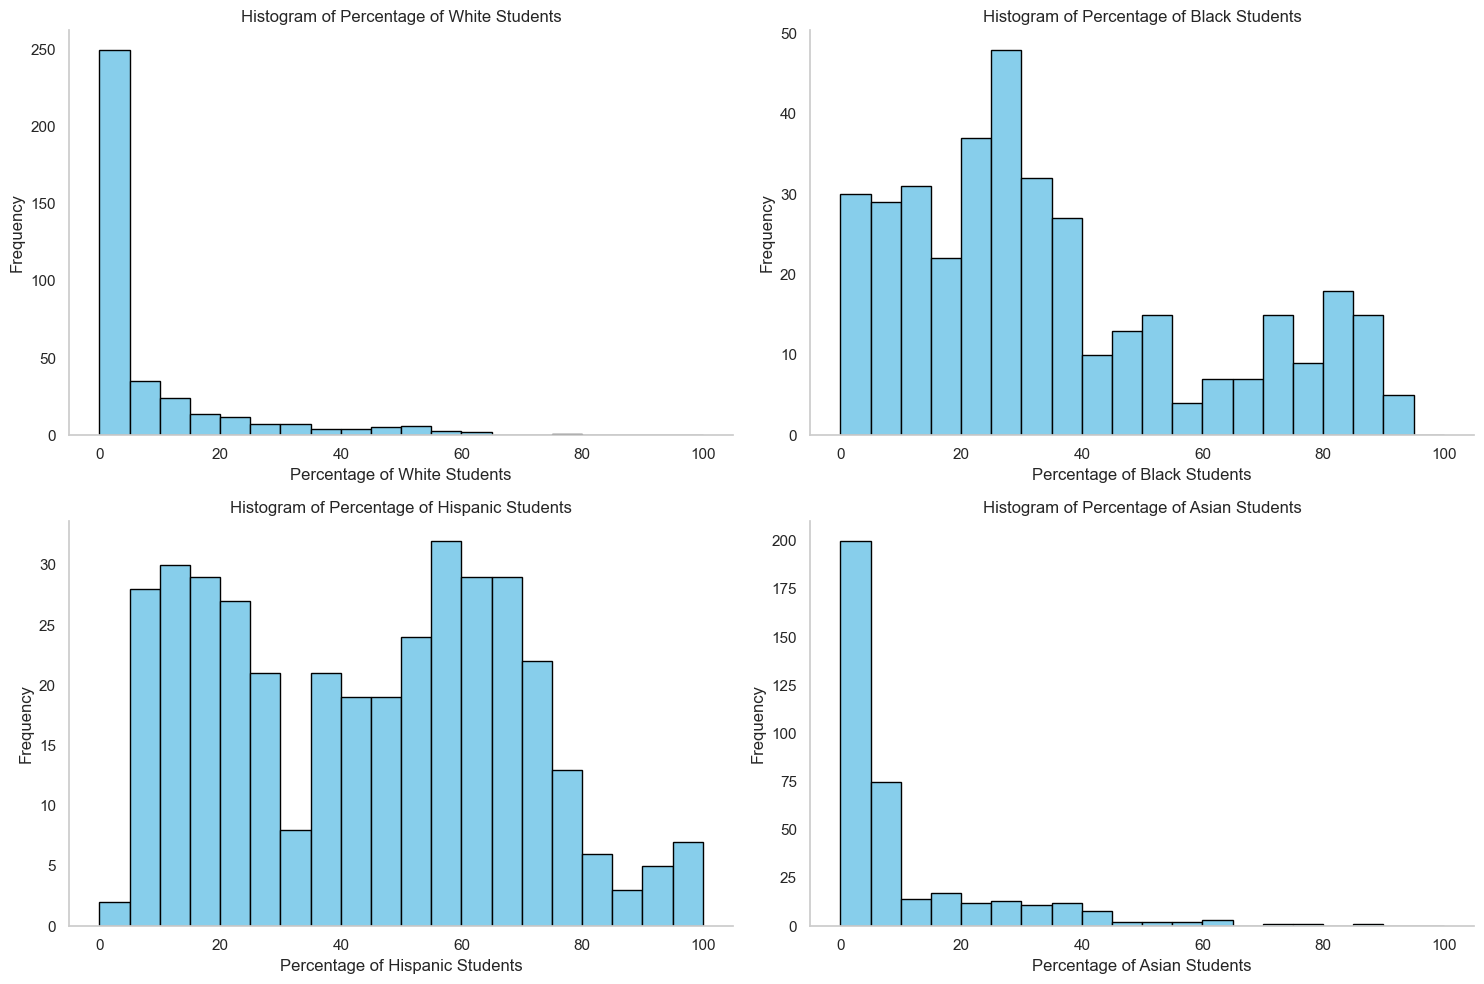

In [435]:
import matplotlib.pyplot as plt

# Define the race variables (excluding 'Other')
race_variables = ['White', 'Black', 'Hispanic', 'Asian']

# Determine the number of subplots needed based on the number of race variables
num_subplots = len(race_variables)

# Calculate the number of rows and columns for the subplot grid
num_rows = num_subplots // 2 + num_subplots % 2
num_cols = 2

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the subplot array
axs = axs.flatten()

# Iterate over each race variable and plot its histogram
for i, race in enumerate(race_variables):
    # Extract all values of the current race variable
    race_values = cleaned_score[race].tolist()
    
    # Plot the histogram with adjusted bins
    axs[i].hist(race_values, bins=range(0, 101, 5), color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of Percentage of {race} Students')
    axs[i].set_xlabel(f'Percentage of {race} Students')
    axs[i].set_ylabel('Frequency')
    axs[i].grid(False)
    # Turn off right and top axes
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




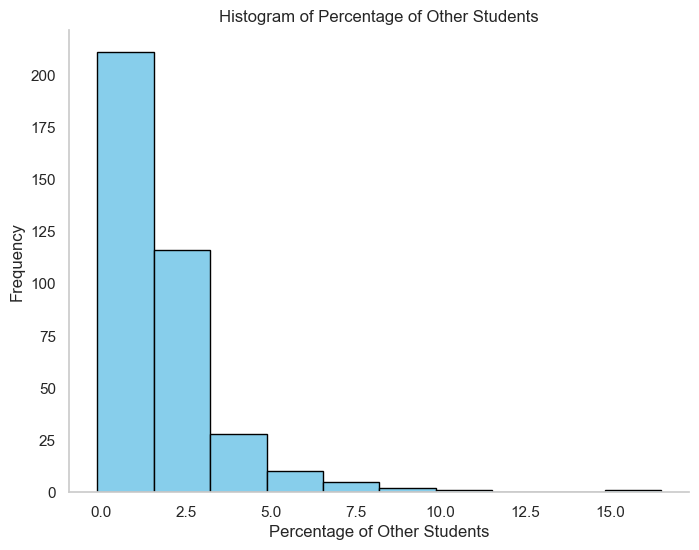

In [436]:
import matplotlib.pyplot as plt

# Extract all values of the "Other" race variable
other_values = cleaned_score['Other'].tolist()

# Plot the histogram with adjusted bins
plt.figure(figsize=(8, 6))
plt.hist(other_values, color='skyblue', edgecolor='black')
plt.title('Histogram of Percentage of Other Students')
plt.xlabel('Percentage of Other Students')
plt.ylabel('Frequency')
plt.grid(False)

# Turn off right and top axes
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Show the plot
plt.show()


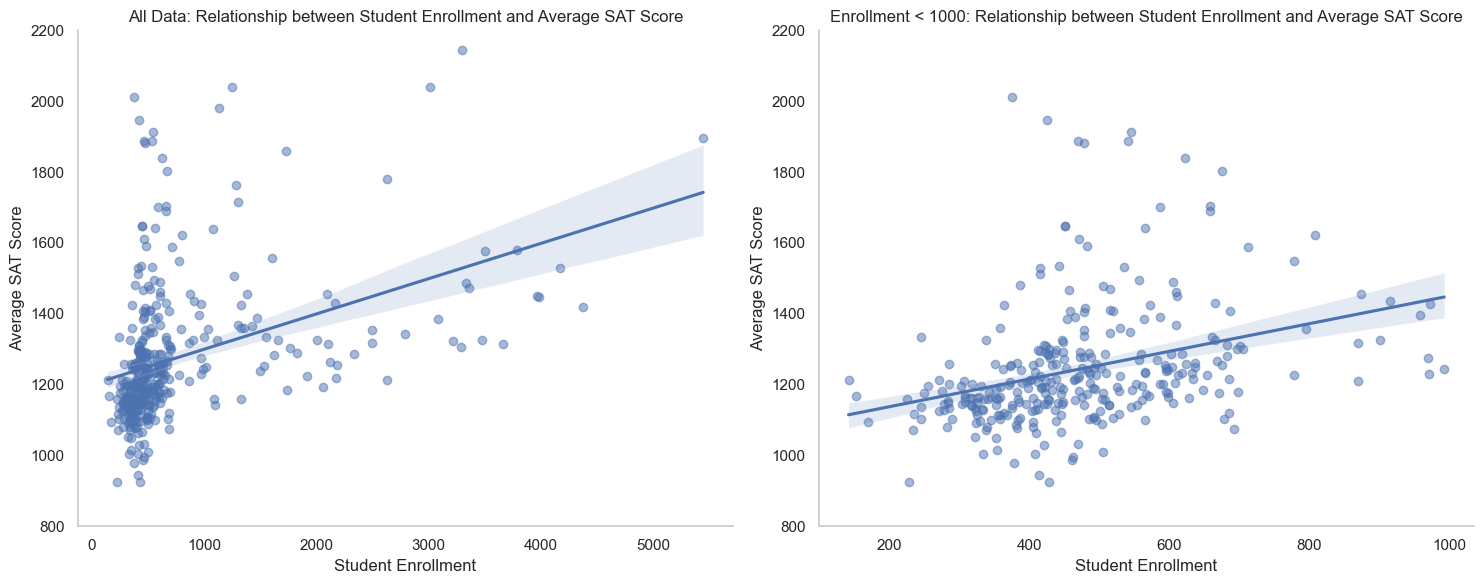

In [437]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Filter the dataset for schools with student enrollment less than 1000
filtered_less1000 = cleaned_score[cleaned_score['Student Enrollment'] < 1000]

# Create a figure with two subplots arranged horizontally
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Create scatter plot with trendline for all data
sns.regplot(x='Student Enrollment', y='Total Average Score', data=cleaned_score, scatter_kws={'alpha': 0.5}, ax=axs[0])

# Set y-axis limits for the first subplot
axs[0].set_ylim(800, 2200)

# Add labels and title for the first subplot
axs[0].set_title('All Data: Relationship between Student Enrollment and Average SAT Score')
axs[0].set_xlabel('Student Enrollment')
axs[0].set_ylabel('Average SAT Score')

# Create scatter plot with trendline for data with enrollment less than 1000
sns.regplot(x='Student Enrollment', y='Total Average Score', data=filtered_less1000, scatter_kws={'alpha': 0.5}, ax=axs[1])

# Set y-axis limits for the second subplot
axs[1].set_ylim(800, 2200)

# Add labels and title for the second subplot
axs[1].set_title('Enrollment < 1000: Relationship between Student Enrollment and Average SAT Score')
axs[1].set_xlabel('Student Enrollment')
axs[1].set_ylabel('Average SAT Score')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Remove background grid from the second subplot
axs[0].grid(False)
axs[1].grid(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Show the plot
plt.show()


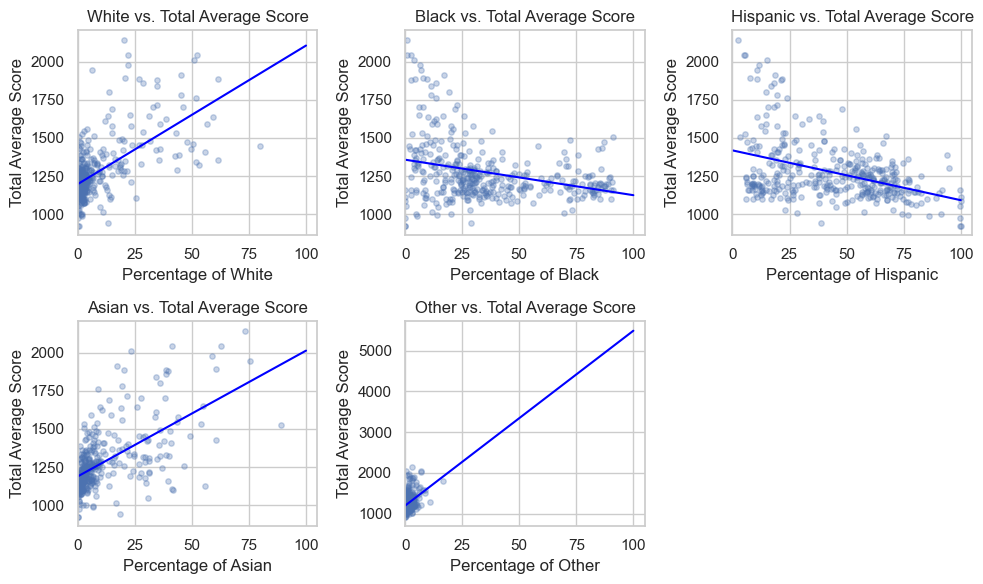

In [170]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Create separate scatter plots for each demographic group
plt.figure(figsize=(10, 6))

# Define transparency values for each demographic group
alpha_values = [0.3, 0.3, 0.3, 0.3, 0.3]  # Adjust as needed

# Get the maximum and minimum values for all demographic groups
max_value = cleaned_score[['White', 'Black', 'Hispanic', 'Asian', 'Other', 'Total Average Score']].max().max()
min_value = cleaned_score[['White', 'Black', 'Hispanic', 'Asian', 'Other', 'Total Average Score']].min().min()

# Loop through each demographic group and plot the scatter plot
for i, demographic_group in enumerate(['White', 'Black', 'Hispanic', 'Asian', 'Other']):
    plt.subplot(2, 3, i+1)  # Subplot for each demographic group
    plt.scatter(cleaned_score[demographic_group], cleaned_score['Total Average Score'], alpha=alpha_values[i], s=15)
    plt.title(f'{demographic_group} vs. Total Average Score')
    plt.xlabel(f'Percentage of {demographic_group}')
    plt.ylabel('Total Average Score')
    plt.xlim(0, 105)
    # Fit linear regression model
    slope, intercept, _, _, _ = linregress(cleaned_score[demographic_group], cleaned_score['Total Average Score'])
    
    # Plot regression line
    x_values = np.linspace(0, 100, 100)
    y_values = slope * x_values + intercept
    plt.plot(x_values, y_values, color='blue')

plt.tight_layout()
plt.show()




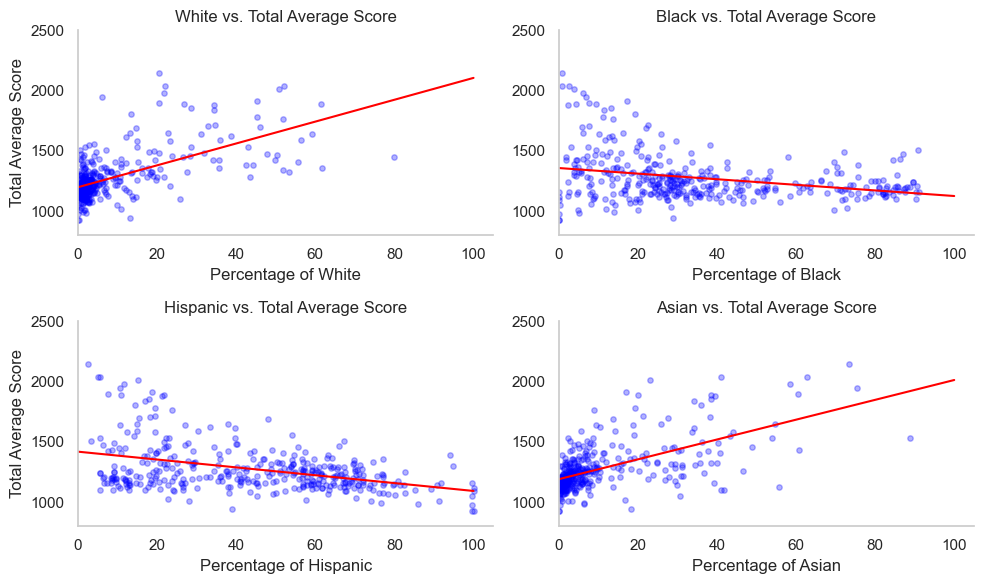

In [438]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Assuming 'Total Average Score', 'White', 'Black', 'Hispanic', and 'Asian' are columns in your dataframe

# Create separate scatter plots for each demographic group
plt.figure(figsize=(10, 6))

# Define transparency values for each demographic group
alpha_values = [0.3, 0.3, 0.3, 0.3]  # Adjust as needed

# Loop through each demographic group and plot the scatter plot
for i, demographic_group in enumerate(['White', 'Black', 'Hispanic', 'Asian']):
    ax = plt.subplot(2, 2, i+1)  # Subplot for each demographic group
    
    # Plot scatter plot
    ax.scatter(cleaned_score[demographic_group], cleaned_score['Total Average Score'], alpha=alpha_values[i], s=15, color="blue")
    ax.set_title(f'{demographic_group} vs. Total Average Score')
    ax.set_xlabel(f'Percentage of {demographic_group}')
    
    # Only show y-axis on the first column
    if i % 2 == 0:
        ax.set_ylabel('Total Average Score')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(color='none')

    # Adjust limits
    ax.set_xlim(0, 105)  # Set x-axis limit to 0-105 for all race groups
    ax.set_ylim(800, 2500)  # Set y-axis limit to 800-2500 for all race groups

    # Fit linear regression model
    slope, intercept, _, _, _ = linregress(cleaned_score[demographic_group], cleaned_score['Total Average Score'])
    
    # Plot regression line with similar color to scatter plot
    color = plt.cm.tab10(i)  # Choose color based on index
    x_values = np.linspace(0, 100, 100)
    y_values = slope * x_values + intercept
    ax.plot(x_values, y_values, color='red')

plt.tight_layout()
plt.show()


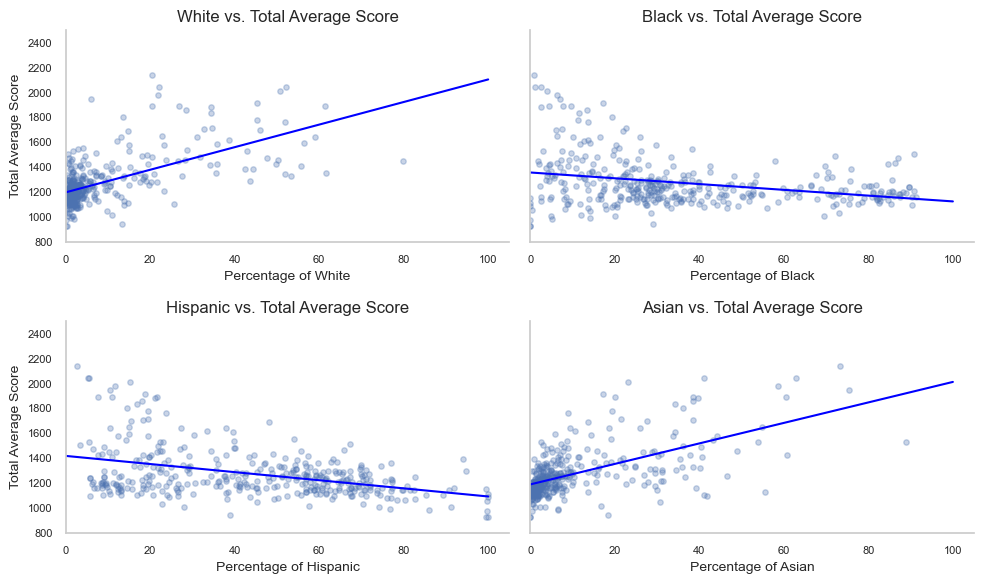

In [246]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Assuming 'Total Average Score', 'White', 'Black', 'Hispanic', and 'Asian' are columns in your dataframe

# Create separate scatter plots for each demographic group
plt.figure(figsize=(10, 6))

# Define transparency values for each demographic group
alpha_values = [0.3, 0.3, 0.3, 0.3]  # Adjust as needed

# Loop through each demographic group and plot the scatter plot
for i, demographic_group in enumerate(['White', 'Black', 'Hispanic', 'Asian']):
    ax = plt.subplot(2, 2, i+1)  # Subplot for each demographic group
    
    # Plot scatter plot
    ax.scatter(cleaned_score[demographic_group], cleaned_score['Total Average Score'], alpha=alpha_values[i], s=15)
    ax.set_title(f'{demographic_group} vs. Total Average Score', fontsize=12)
    ax.set_xlabel(f'Percentage of {demographic_group}', fontsize=10)
    ax.tick_params(axis='x', labelsize=8)  # Customize x-axis ticks
    ax.tick_params(axis='y', labelsize=8)  # Customize y-axis ticks
    
    # Only show y-axis on the first column
    if i % 2 == 0:
        ax.set_ylabel('Total Average Score', fontsize=10)
    else:
        ax.set_yticks([])  # Remove y-axis labels for other subplots in the same row
    
    # Remove background grid lines
    ax.grid(color='none')  # Set grid color to transparent

    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Adjust limits
    ax.set_xlim(0, 105)  # Set x-axis limit to 0-105 for all race groups
    ax.set_ylim(800, 2500)  # Set y-axis limit to 800-2500 for all race groups

    # Fit linear regression model
    slope, intercept, _, _, _ = linregress(cleaned_score[demographic_group], cleaned_score['Total Average Score'])
    
    # Plot regression line with similar color to scatter plot
    x_values = np.linspace(0, 100, 100)
    y_values = slope * x_values + intercept
    ax.plot(x_values, y_values, color='blue')

# Remove excess whitespace
plt.tight_layout()

# Show plot
plt.show()


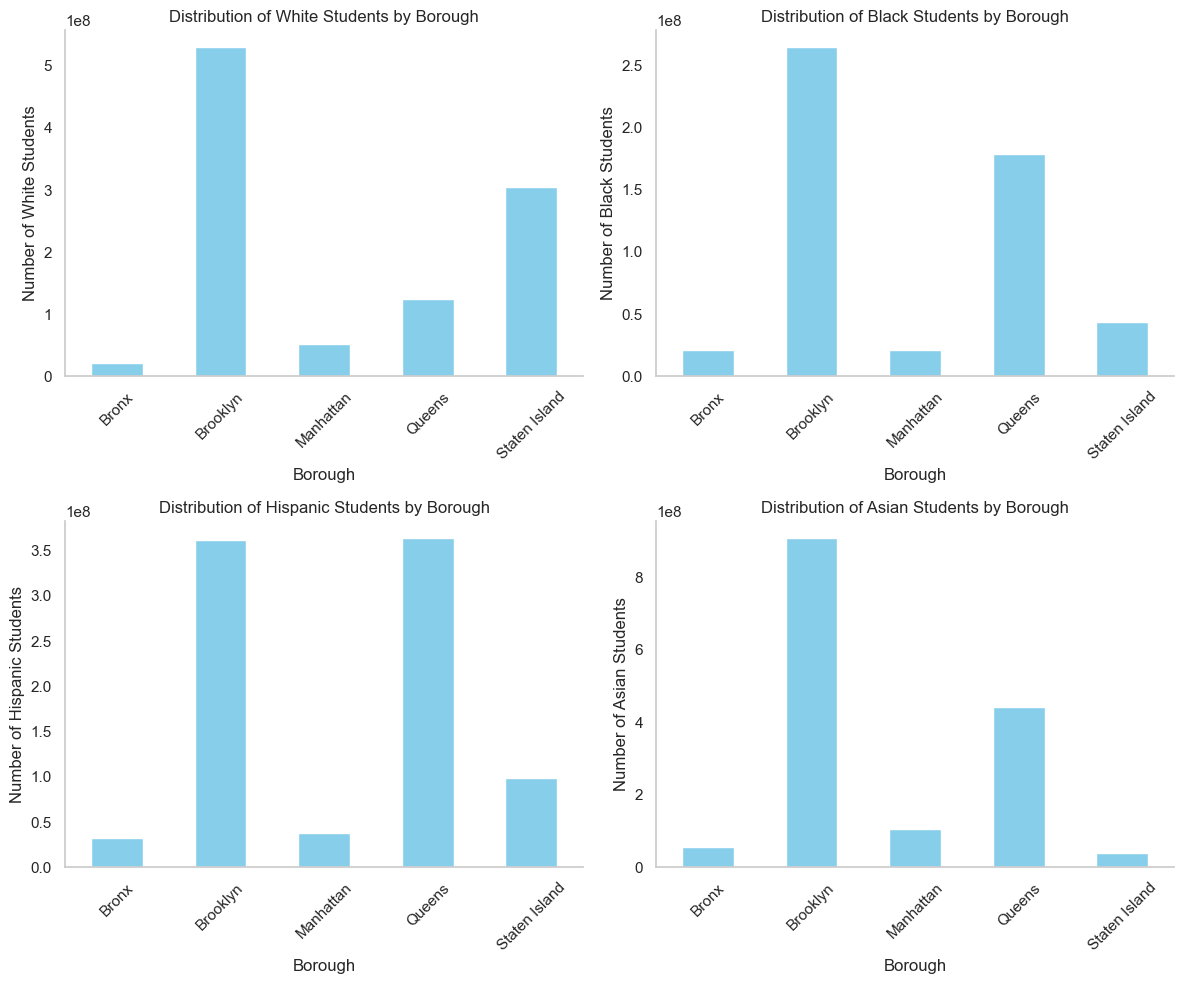

In [421]:
import matplotlib.pyplot as plt

# Convert race percentages to actual number of students
for race in ['White', 'Black', 'Hispanic', 'Asian']:
    cleaned_score[race] = (cleaned_score[race] * cleaned_score['Student Enrollment']) / 100

# Group the data by borough and calculate the sum of students of each race in each borough
race_by_borough = cleaned_score.groupby('Borough').agg({'White': 'sum', 'Black': 'sum', 'Hispanic': 'sum', 'Asian': 'sum'})

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot distribution of White students by borough
race_by_borough['White'].plot(kind='bar', color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of White Students by Borough')
axs[0, 0].set_xlabel('Borough')
axs[0, 0].set_ylabel('Number of White Students')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].spines['right'].set_visible(False)
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].grid(False)

# Plot distribution of Black students by borough
race_by_borough['Black'].plot(kind='bar', color='skyblue', ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Black Students by Borough')
axs[0, 1].set_xlabel('Borough')
axs[0, 1].set_ylabel('Number of Black Students')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].spines['right'].set_visible(False)
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].grid(False)

# Plot distribution of Hispanic students by borough
race_by_borough['Hispanic'].plot(kind='bar', color='skyblue', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Hispanic Students by Borough')
axs[1, 0].set_xlabel('Borough')
axs[1, 0].set_ylabel('Number of Hispanic Students')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].spines['right'].set_visible(False)
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].grid(False)

# Plot distribution of Asian students by borough
race_by_borough['Asian'].plot(kind='bar', color='skyblue', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Asian Students by Borough')
axs[1, 1].set_xlabel('Borough')
axs[1, 1].set_ylabel('Number of Asian Students')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].spines['right'].set_visible(False)
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].grid(False)

plt.tight_layout()
plt.show()


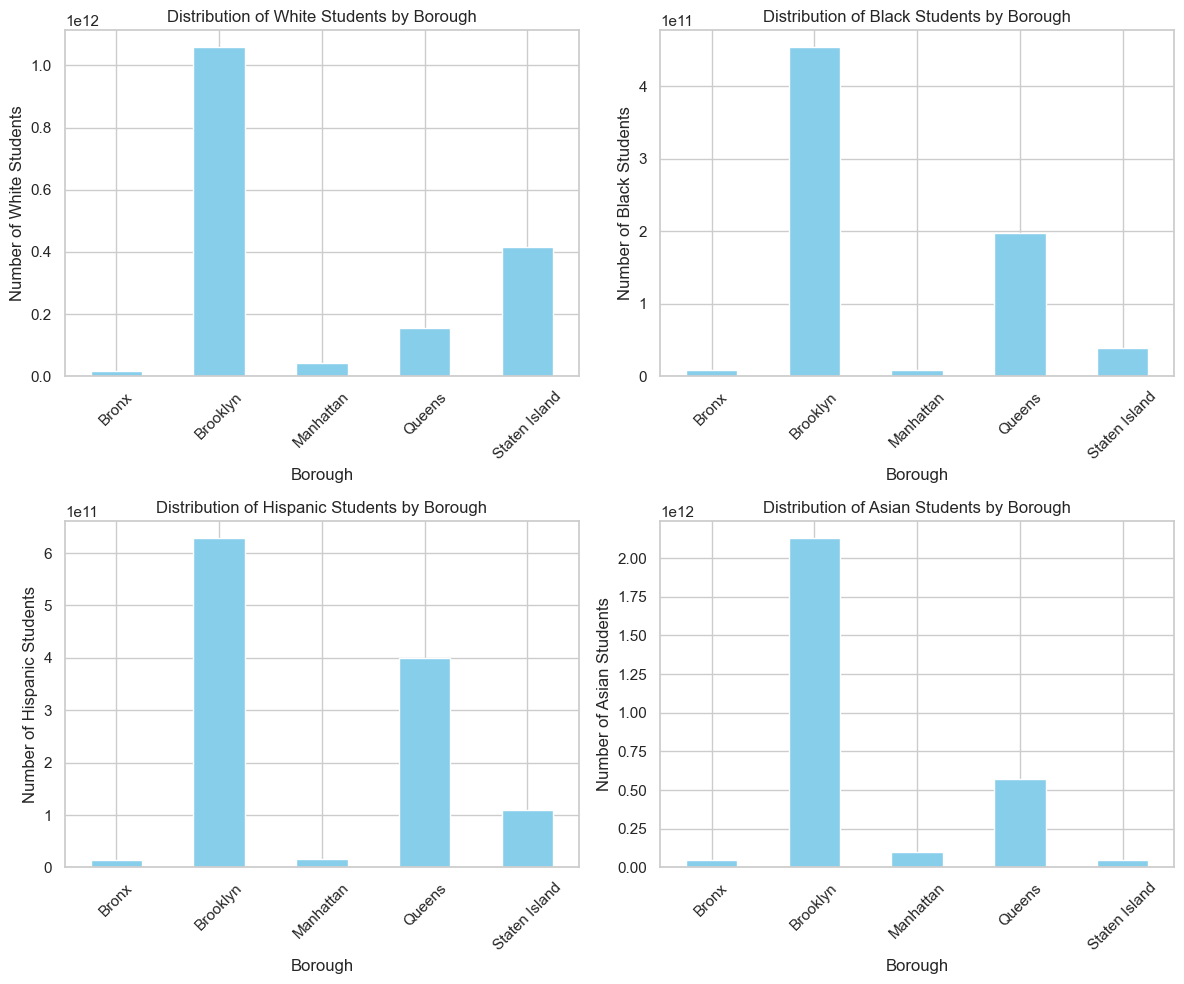

In [423]:
import matplotlib.pyplot as plt

# Convert race percentages to actual number of students
for race in ['White', 'Black', 'Hispanic', 'Asian']:
    cleaned_score[race] = cleaned_score[race] * cleaned_score['Student Enrollment'] / 100

# Group the data by borough and calculate the sum of students of each race in each borough
race_by_borough = cleaned_score.groupby('Borough').agg({'White': 'sum', 'Black': 'sum', 'Hispanic': 'sum', 'Asian': 'sum'})

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot distribution of White students by borough
race_by_borough['White'].plot(kind='bar', color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of White Students by Borough')
axs[0, 0].set_xlabel('Borough')
axs[0, 0].set_ylabel('Number of White Students')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot distribution of Black students by borough
race_by_borough['Black'].plot(kind='bar', color='skyblue', ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Black Students by Borough')
axs[0, 1].set_xlabel('Borough')
axs[0, 1].set_ylabel('Number of Black Students')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot distribution of Hispanic students by borough
race_by_borough['Hispanic'].plot(kind='bar', color='skyblue', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Hispanic Students by Borough')
axs[1, 0].set_xlabel('Borough')
axs[1, 0].set_ylabel('Number of Hispanic Students')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot distribution of Asian students by borough
race_by_borough['Asian'].plot(kind='bar', color='skyblue', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Asian Students by Borough')
axs[1, 1].set_xlabel('Borough')
axs[1, 1].set_ylabel('Number of Asian Students')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


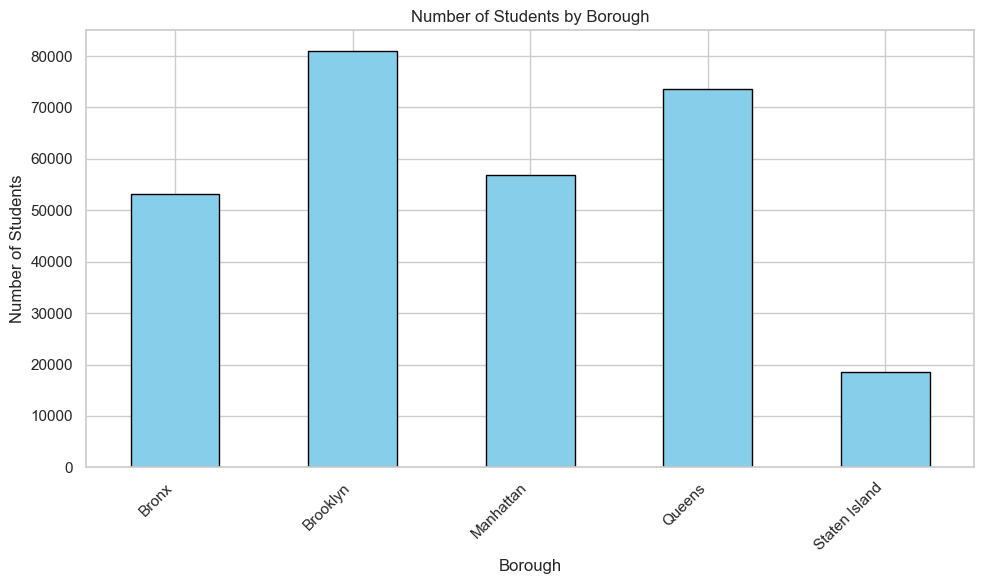

In [345]:
import matplotlib.pyplot as plt

# Group the data by borough and calculate the total number of students in each borough
borough_students = cleaned_score.groupby('Borough')['Student Enrollment'].sum()

# Plot the bar graph
plt.figure(figsize=(10, 6))
borough_students.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Students by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [407]:
# Calculate the number of students for each race
cleaned_score['White_Students'] = (cleaned_score['White'] * cleaned_score['Student Enrollment']) / 100
cleaned_score['Black_Students'] = (cleaned_score['Black'] * cleaned_score['Student Enrollment']) / 100
cleaned_score['Hispanic_Students'] = (cleaned_score['Hispanic'] * cleaned_score['Student Enrollment']) / 100
cleaned_score['Asian_Students'] = (cleaned_score['Asian'] * cleaned_score['Student Enrollment']) / 100
cleaned_score['Other_Students'] = (cleaned_score['Other'] * cleaned_score['Student Enrollment']) / 100



In [391]:
# Sum the number of students for each race
total_students_by_race = cleaned_score[['White_Students', 'Black_Students', 'Hispanic_Students', 'Asian_Students', 'Other_Students']].sum()

# Display the total number of students by race
print(total_students_by_race)


White_Students       38488
Black_Students       79995
Hispanic_Students   110323
Asian_Students       49050
Other_Students        5060
dtype: float64


In [393]:
# Group the data by borough and sum the number of students for each race
total_students_by_borough = cleaned_score.groupby('Borough')[['White_Students', 'Black_Students', 'Hispanic_Students', 'Asian_Students', 'Other_Students']].sum()

# Display the total number of students by race and borough
print(total_students_by_borough)


               White_Students  Black_Students  Hispanic_Students  \
Borough                                                            
Bronx                    2373           14730              31452   
Brooklyn                11626           32598              21248   
Manhattan                7219           13289              26465   
Queens                   8224           16576              26615   
Staten Island            9046            2802               4542   

               Asian_Students  Other_Students  
Borough                                        
Bronx                    3717             818  
Brooklyn                14102            1363  
Manhattan                8597            1220  
Queens                  20772            1452  
Staten Island            1863             207  


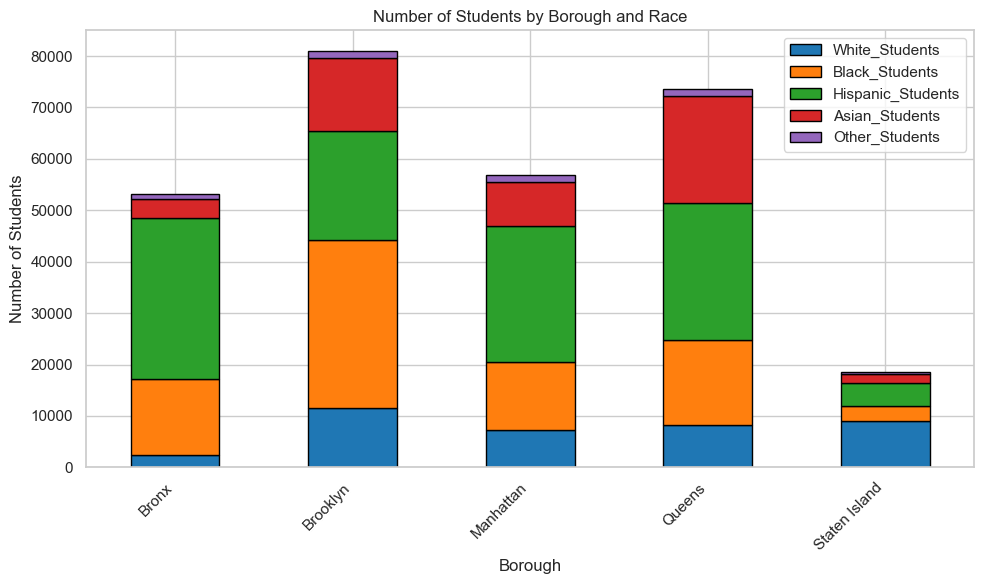

In [405]:
import matplotlib.pyplot as plt

# Define colors for each race
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Blue, Orange, Green, Red, Purple

# Group the data by borough and sum the number of students for each race
total_students_by_borough_race = cleaned_score.groupby('Borough')[['White_Students', 'Black_Students', 'Hispanic_Students', 'Asian_Students', 'Other_Students']].sum()

# Plot the stacked bar graph
plt.figure(figsize=(10, 6))
total_students_by_borough_race.plot(kind='bar', stacked=True, edgecolor='black', ax=plt.gca(), color=colors)
plt.title('Number of Students by Borough and Race')
plt.xlabel('Borough')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



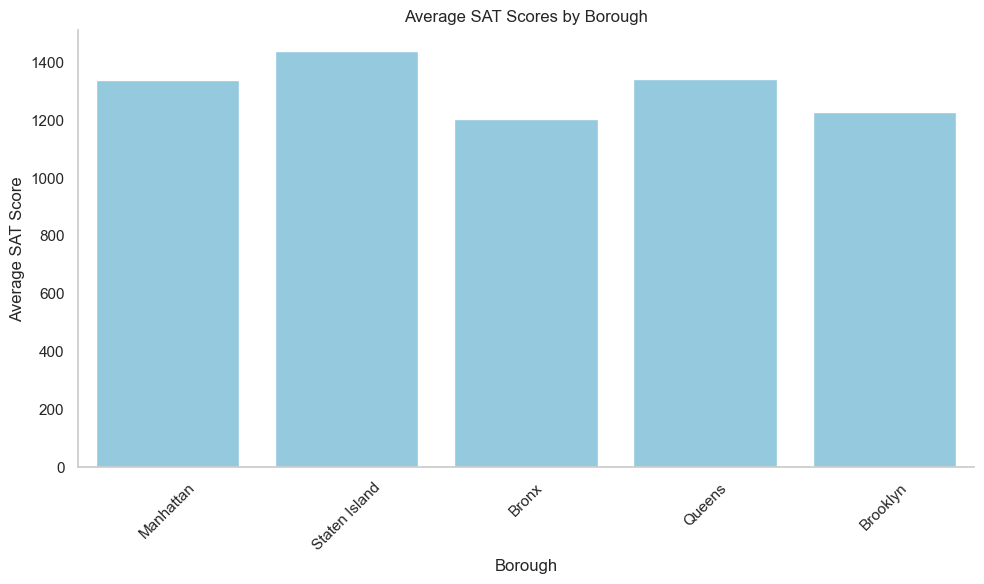

In [444]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Borough', y='Total Average Score', data=cleaned_score, errorbar=None, color='skyblue')
plt.title('Average SAT Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Average SAT Score')
plt.xticks(rotation=45)
plt.tight_layout()
# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Remove grid
plt.grid(False)
plt.show()




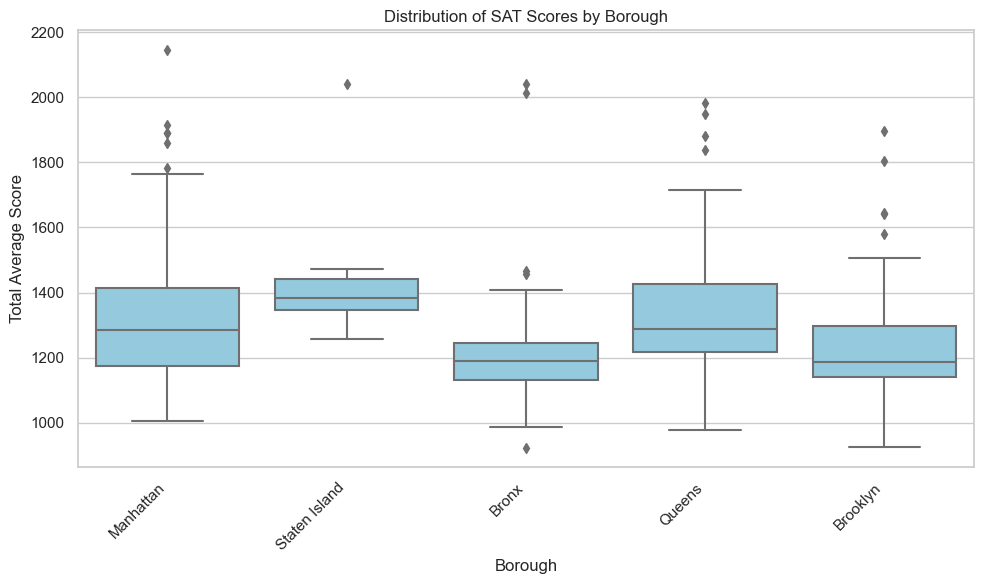

In [447]:

# Set plot style
sns.set(style="whitegrid")

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Borough', y='Total Average Score', data=cleaned_score, color='skyblue')
plt.title('Distribution of SAT Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
# Remove grid
plt.show()


## Conclusion

## Reference